# Financial Inclusion in East Africa

## Loading the relevant libraries and the dataset

In [160]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

import seaborn as sns

import pandas_profiling

In [161]:
df = pd.read_csv('Financial Dataset - 1.csv')
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


## Data cleaning and exploration 

In [162]:
df.shape

(23524, 13)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23510 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
Has a Bank account        23488 non-null object
Type of Location          23509 non-null object
Cell Phone Access         23513 non-null object
household_size            23496 non-null float64
Respondent Age            23490 non-null float64
gender_of_respondent      23490 non-null object
The relathip with head    23520 non-null object
marital_status            23492 non-null object
Level of Educuation       23495 non-null object
Type of Job               23494 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [164]:
df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [165]:
df.profile_report(style = {'full_width':True})

In [166]:
df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has_a_Bank_account        36
Type_of_Location          15
Cell_Phone_Access         11
household_size            28
Respondent_Age            34
gender_of_respondent      34
The_relathip_with_head     4
marital_status            32
Level_of_Educuation       29
Type_of_Job               30
dtype: int64

In [167]:
df.dropna(inplace= True)

In [168]:
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has_a_Bank_account         object
Type_of_Location           object
Cell_Phone_Access          object
household_size            float64
Respondent_Age            float64
gender_of_respondent       object
The_relathip_with_head     object
marital_status             object
Level_of_Educuation        object
Type_of_Job                object
dtype: object

In [169]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has_a_Bank_account        0
Type_of_Location          0
Cell_Phone_Access         0
household_size            0
Respondent_Age            0
gender_of_respondent      0
The_relathip_with_head    0
marital_status            0
Level_of_Educuation       0
Type_of_Job               0
dtype: int64

### detecting and removing outliers

<function matplotlib.pyplot.show(*args, **kw)>

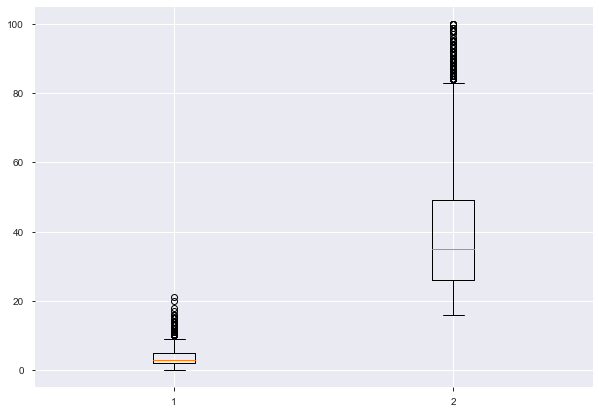

In [170]:
outliers = [df['household_size'],df['Respondent_Age']]
fig = plt.figure(1,figsize=(10,7))
ax = fig.add_subplot(111)
bp=ax.boxplot(outliers)
plt.show

year               2.0
household_size     3.0
Respondent_Age    23.0
dtype: float64
       Cell_Phone_Access  Has_a_Bank_account  Level_of_Educuation  \
0                  False               False                False   
1                  False               False                False   
2                  False               False                False   
3                  False               False                False   
4                  False               False                False   
...                  ...                 ...                  ...   
23519              False               False                False   
23520              False               False                False   
23521              False               False                False   
23522              False               False                False   
23523              False               False                False   

       Respondent_Age  The_relathip_with_head  Type_of_Job  Type_of_Location  \
0      

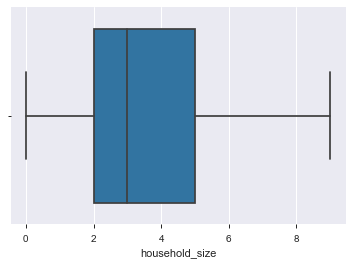

In [171]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
sns.boxplot(df['household_size'])

year               2.0
household_size     3.0
Respondent_Age    22.0
dtype: float64
       Cell_Phone_Access  Has_a_Bank_account  Level_of_Educuation  \
0                  False               False                False   
1                  False               False                False   
2                  False               False                False   
3                  False               False                False   
4                  False               False                False   
...                  ...                 ...                  ...   
23512              False               False                False   
23519              False               False                False   
23520              False               False                False   
23521              False               False                False   
23522              False               False                False   

       Respondent_Age  The_relathip_with_head  Type_of_Job  Type_of_Location  \
0      

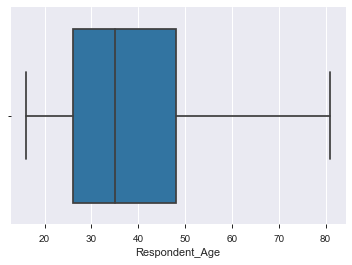

In [172]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
sns.boxplot(df['Respondent_Age'])

In [173]:
df.drop_duplicates(keep = 'first')

,country,year,uniqueid,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,The_relathip_with_head,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,Uganda,2018,uniqueid_2102,No,Rural,No,2.0,57.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income


In [174]:
cols = df[['uniqueid','The_relathip_with_head']]
df= df.drop(cols,axis = 1)

In [175]:
df.head()

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


## Exploratory Data Analysis

In [176]:
!pip install factor_analyzer==0.2.3

### Univariate Analysis

In [177]:
df['Has_a_Bank_account'].value_counts()

No     19424
Yes     3228
Name: Has_a_Bank_account, dtype: int64

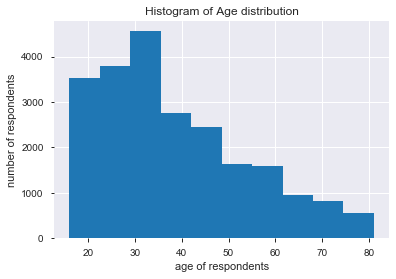

In [178]:
plt.hist(df['Respondent_Age'],bins= 10)

plt.xlabel('age of respondents')
plt.ylabel('number of respondents')
plt.title('Histogram of Age distribution')
plt.show()

In [179]:
df['Cell_Phone_Access'].mode()

0    Yes
dtype: object

In [180]:
df['household_size'].mean()

3.584142680558008

In [181]:
df['Respondent_Age'].median()

35.0

In [182]:
df['household_size'].std()

2.0807569358557267

In [183]:
df['gender_of_respondent'].value_counts()

Female    13362
Male       9290
Name: gender_of_respondent, dtype: int64

In [184]:
df['household_size'].var()

4.329549426111713

In [185]:
df['Respondent_Age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: Respondent_Age, dtype: float64

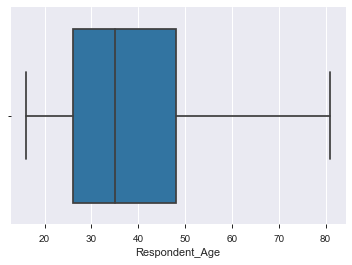

In [186]:
sns.boxplot(df['Respondent_Age'])

In [187]:
df['household_size'].skew()

0.6029374931143053

In [188]:
df['household_size'].kurt()

-0.5091220049695515

In [189]:
def age_range():
    age_max = df['Respondent_Age'].max()
    age_min = df['Respondent_Age'].min()

    return age_max-age_min

age_range()


65.0

In [190]:
df.head(2)

,country,year,Has_a_Bank_account,Type_of_Location,Cell_Phone_Access,household_size,Respondent_Age,gender_of_respondent,marital_status,Level_of_Educuation,Type_of_Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent


### Bivariate Analysis

In [191]:
df['household_size'].corr(df['Respondent_Age'])

-0.1018878362194116

In [192]:
from scipy import stats

stats.zscore(df['Respondent_Age'])

array([-0.90880631,  2.03400099, -0.78085817, ..., -0.71688409,
       -0.71688409, -0.52496188])

In [193]:
from scipy.stats import ttest_ind

x = df['Respondent_Age']
y = df['household_size']

t_stat, p_value = ttest_ind(x, y)

t_stat

330.4321812303267

### Multivariate Analysis

In [151]:
!pip install sklearn

In [194]:
df.shape

(22652, 11)

In [ ]:
df.head()

In [196]:
x = df.drop(['Has_a_Bank_account'],axis=1)
y = df['Has_a_Bank_account']

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [199]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'Rwanda'